## Jugando con Probabilidades y Python

Bien, ahora que ya sabemos como calcular [probabilidades](https://es.wikipedia.org/wiki/Probabilidad), llegó finalmente el momento de ponerse a resolver las situaciones planteadas en el comienzo, para eso vamos a utilizar nuevamente un poco de [Python](https://www.python.org/). 

### La coincidencia de cumpleaños

La [paradoja del cumpleaños](https://es.wikipedia.org/wiki/Paradoja_del_cumplea%C3%B1os) es un problema muy conocido en el campo de la [teoría de probabilidad](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_la_probabilidad).
Plantea las siguientes interesantes preguntas: ¿Cuál es la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de que, en un grupo de personas elegidas al azar, al menos dos de ellas habrán nacido el mismo día del año? ¿Cuántas personas son necesarias para asegurar una probabilidad mayor al 50%?. Excluyendo el 29 de febrero de nuestros cálculos y asumiendo que los restantes 365 días de posibles cumpleaños son igualmente probables, nos sorprendería darnos cuenta de que, en un grupo de sólo 23 personas, la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de que dos personas compartan la misma fecha de cumpleaños es mayor al 50%!.

Esto ya nos dice algo respecto a nuestras chances en la apuesta con nuestro amigo, pero de todas formas calculemos la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) en un grupo de 50 personas. Calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de un cumpleaños duplicado puede parecer una tarea desalentadora. Pero ¿qué pasa con calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de que no haya un cumpleaños duplicado? Esto es realmente una tarea más fácil. Especialmente si simplificamos el problema a un grupo muy pequeño. Supongamos que  el grupo sólo tiene una persona, en ese caso, hay una probabilidad del 100% que esta persona no comparte un cumpleaños puesto que no hay nadie más quien compartir. Pero ahora podemos añadir una segunda persona al grupo. ¿Cuáles son las posibilidades de que tenga un cumpleaños diferente de esa persona? De hecho esto es bastante fácil, hay 364 otros días en el año, así que las posibilidades son 364/365. ¿Qué tal si agregamos una tercera persona al grupo? Ahora hay 363/365 días. Para obtener la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) general de que no hay cumpleaños compartidos simplemente multiplicamos las probabilidades individuales. Si utilizamos este procedimiento, con la ayuda de [Python](https://www.python.org/) podemos calcular fácilmente las [probabilidades](https://es.wikipedia.org/wiki/Probabilidad) de un cumpleaños compartido en un grupo de 50 personas.

In [1]:
# Ejemplo situación 2 La coincidencia de cumpleaños
prob = 1.0
asistentes = 50

for i in range(asistentes):
    prob = prob * (365-i)/365

print("Probabilidad de que compartan una misma fecha de cumpleaños es {0:.2f}"
      .format(1 - prob))

Probabilidad de que compartan una misma fecha de cumpleaños es 0.97


Como vemos, la apuesta de nuestro amigo es casi una apuesta segura para él. Se ve que conoce bastante bien la [teoría de probabilidad](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_la_probabilidad) y quiere disfrutar de la fiesta a consta nuestra!



## Variables aleatorias. Vamos a tirar un dado

The first sort of random variable we'll look at is discrete - these take values from an enumerated set, like the dice example above. The main rule for a discrete random variable is that the sum of all the probabilities (across all the discrete options) has to be exactly 1.

Let's reproduce a six-sided die in Python, with the handy `random` from the standard library:

In [3]:
import random
dir(random)  # Let's see what we've got

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [4]:
# Lots of stuff! "randint" sounds promising, integers are discrete
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [5]:
# Looking good - let's give it a try
die_roll_1 = random.randint(1, 6)
print(die_roll_1)

3


In [6]:
# Let's do a bunch of rolls and save them in a list
die_rolls = [random.randint(1, 6) for _ in range(20)]
print(die_rolls)

[1, 6, 5, 4, 1, 1, 3, 2, 2, 5, 5, 5, 5, 2, 1, 2, 3, 1, 4, 4]


In [7]:
# What can we say about these? Well, we can figure out the mean
sum(die_rolls) / len(die_rolls)

3.1

In [8]:
# And we can figure out the median

sorted(die_rolls)[len(die_rolls) // 2]

3

In [9]:
#Calculando la moda utilizando la función max(). La clave es la cuenta de los valores de la lista, y se calcula el máximo

mode = max(set(die_rolls), key=die_rolls.count)
print(mode)



1


#### Otra forma de calcular la moda 

In [10]:
def printMode(a) : 
  
    # variable to store max of  
    # input array which will  
    # to have size of count array  
    max_element = max(a)  
  
    # auxiliary(count) array to store count.  
    # Initialize count array as 0. Size  
    # of count array will be equal to (max + 1).  
    t = max_element + 1
    count = [0] * t 
    
    # Store count of each element  
    # of input array  
    for i in range(len(a)) : 
        count[a[i]] += 1
  
    # mode is the index with maximum count  
    mode = 0
    k = count[0] 
    for i in range(1, t) :  
        if (count[i] > k) :  
            k = count[i] 
            mode = i  
    print("mode = ", mode) 


printMode(die_rolls)




mode =  1


#### Otra forma de calcular la moda 

In [11]:
from statistics import mode
mode(die_rolls)


StatisticsError: no unique mode; found 2 equally common values

## Viendo como evoluciona el número de 6 cuando sacamos más jugadas

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 

# moneda p=1/6 cara=1 seca=0
resultados = []
final = []
for lanzamientos in range(1,10000):
    die_rolls = [random.randint(1, 6) for _ in range(lanzamientos)]
    seises= die_rolls.count(6)
    resultados.append((seises/lanzamientos))

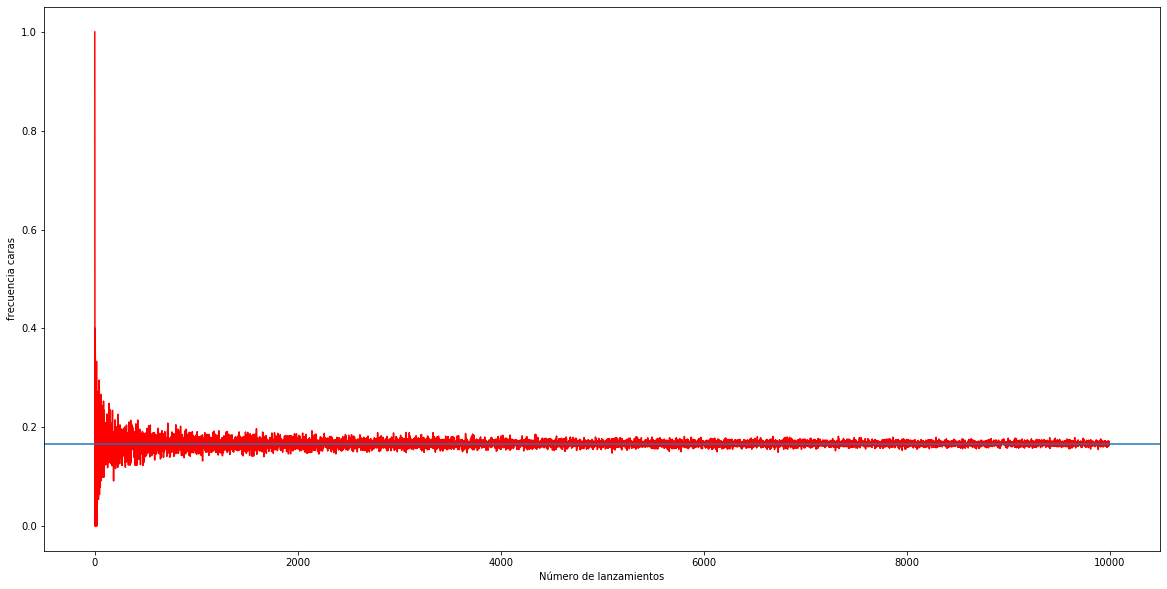

In [19]:
   
# graficamente

x=range(0,9999)
#df = pd.DataFrame({ 'seises' : resultados})
#df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.figure(figsize=(20,10))
plt.plot(x,resultados,color='r')
plt.axhline(0.1666)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

# Resolviendo la situación 2 - ¿Que puerta elegir?

Este problema, más conocido con el nombre de [Monty Hall](https://es.wikipedia.org/wiki/Problema_de_Monty_Hall), también es un problema muy popular dentro de la [teoría de probabilidad](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_la_probabilidad); y se destaca por su solución que a simple vista parece totalmente anti-intuitiva.
Intuitivamente, es bastante sencillo que nuestra elección original (cuando hay tres puertas para elegir) tiene una [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de 1/3 de ganar el concurso. Las cosas sin embargo se complican, cuando se descarta una puerta. Muchos dirían que ahora tenemos una [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de 1/2 de ganar, seleccionando cualquiera de las dos puertas; pero este no es el caso. Un aspecto crítico del problema es darse cuenta de que la elección de la puerta a descartar por el presentador, no es una decisión al azar. El presentador puede descartar una puerta porque él sabe (a) qué puerta hemos seleccionado y (b) qué puerta tiene la ferrari. De hecho, en muchos casos, el presentador debe quitar una puerta específica. Por ejemplo, si seleccionamos la puerta 1 y el premio está detrás de la puerta 3, el presentador no tiene otra opción que retirar la puerta 2. Es decir, que la elección de la puerta a descartar está condicionada tanto por la puerta con el premio como por la puerta que seleccionamos inicialmente. Este hecho, cambia totalmente la naturaleza del juego, y hace que las [probabilidades](https://es.wikipedia.org/wiki/Probabilidad) de ganar sean 2/3 si cambiamos de puerta!.

Si aun no están convencidos, simulemos los resultados del concurso con la ayuda de [Python](https://www.python.org/).

# Monty Hall sin clases

In [ ]:
import numpy as np



def elegir_puerta():
    """
    Función para elegir una puerta. Devuelve 1, 2, o 3 en forma aleatoria.
    """
    numero = np.random.randint(1,4)
    return numero

 

def selecciona_puerta():
    """
    Selecciona la puerta del concursante en forma aleatoria.
    """
    puerta_elegida = elegir_puerta()
    return puerta_elegida

    
def descarta_puerta(puerta_ganadora,puerta_elegida):
    """
    Con este método el presentador descarta una de la puertas.
    """
    # elegir puerta en forma aleatoria .
    d = elegir_puerta()
    # Si es al puerta ganadora o la del concursante, volver a elegir.
    while d == puerta_ganadora or d == puerta_elegida:
            d = elegir_puerta()
        # Asignar el valor a puerta_descartada.
    puerta_descartada = d
    return puerta_descartada

def cambiar_puerta(puerta_elegida,puerta_descartada):
    """
    Cambia la puerta del concursante una vez que se elimino una puerta.
    """
    # 1+2+3=6. Solo existe una puerta para elegir.
    puerta_elegida = 6 - puerta_elegida - puerta_descartada
    return puerta_elegida

def gana_concursante(puerta_elegida,puerta_ganadora):
    """
    Determina si el concursante gana. 
    Devuelve True si gana, False si pierde.
    """
    #print (puerta_elegida)
    #print (puerta_ganadora)
    return puerta_elegida == puerta_ganadora
            

def jugar(cambiar=True):
    puerta_elegida = 0
    puerta_descartada = 0
    
    """
    Una vez que la clase se inicio, jugar el concurso.
 
    'cambiar' determina si el concursante cambia su elección.
    """
    #definimos la puerta donde está el premio
    puerta_ganadora = elegir_puerta()
    
    # El concursante elige una puerta.
    puerta_elegida = selecciona_puerta()
    
    # El presentador elimina una puerta.    
    puerta_descartada= descarta_puerta(puerta_ganadora,puerta_elegida)
    
    # El concursante cambia su elección si cambiar es True.
    if cambiar:
        puerta_elegida = cambiar_puerta(puerta_elegida,puerta_descartada)
    
    # Determinar si el concursante ha ganado.
    return gana_concursante(puerta_elegida,puerta_ganadora)


# creamos una lista para almacenar los resultados. Si el concursante gana se almacena un True
numero_de_repeticiones = 10000
lista =[]
for i in range(numero_de_repeticiones):
    lista.append(jugar())
    
#print(lista)
print("El concursante gana en", lista.count(True),"ocasiones")
print("El concursante pierde en",lista.count(False),"ocasiones")

## Monty Hall con Clases

In [ ]:
# <!-- collapse=True -->
# Ejemplo situación 2 ¿Que puerta elegir? (el problema Monty Hall)
def elegir_puerta():
    """
    Función para elegir una puerta. Devuelve 1, 2, o 3 en forma aleatoria.
    """
    return np.random.randint(1,4)


class MontyHall:
    """
    Clase para modelar el problema de Monty Hall.
    """
    def __init__(self):
        """
        Crea la instancia del problema. 
        """
        # Elige una puerta en forma aleatoria.
        self.puerta_ganadora = elegir_puerta()
        # variables para la puerta elegida y la puerta descartada
        self.puerta_elegida = None
        self.puerta_descartada = None
 
    def selecciona_puerta(self):
        """
        Selecciona la puerta del concursante en forma aleatoria.
        """
        self.puerta_elegida = elegir_puerta()
 
    def descarta_puerta(self):
        """
        Con este método el presentador descarta una de la puertas.
        """
        # elegir puerta en forma aleatoria .
        d = elegir_puerta()
        # Si es al puerta ganadora o la del concursante, volver a elegir.
        while d == self.puerta_ganadora or d == self.puerta_elegida:
            d = elegir_puerta()
        # Asignar el valor a puerta_descartada.
        self.puerta_descartada = d
 
    def cambiar_puerta(self):
        """
        Cambia la puerta del concursante una vez que se elimino una puerta.
        """
        # 1+2+3=6. Solo existe una puerta para elegir.
        self.puerta_elegida = 6 - self.puerta_elegida - self.puerta_descartada
 
    def gana_concursante(self):
        """
        Determina si el concursante gana. 
        Devuelve True si gana, False si pierde.
        """
        return self.puerta_elegida == self.puerta_ganadora
            
 
    def jugar(self, cambiar=True):
        """
        Una vez que la clase se inicio, jugar el concurso.
 
        'cambiar' determina si el concursante cambia su elección.
        """
        # El concursante elige una puerta.
        self.selecciona_puerta()
        # El presentador elimina una puerta.
        self.descarta_puerta()
        # El concursante cambia su elección.
        if cambiar:
            self.cambiar_puerta()
        # Determinar si el concursante ha ganado.
        return self.gana_concursante()

In [ ]:
# Ahora, jugamos el concurso. primero nos vamos a quedar con nuestra elección
# inicial. Vamos a ejecutar el experimiento 10.000 veces.
gana, pierde = 0, 0
for i in range(10000):
    # Crear la instancia del problema.
    s2 = MontyHall()
    # ejecutar el concurso sin cambiar de puerta..
    if s2.jugar(cambiar=False):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)
 
print("\n10.000 concursos sin cambiar de puerta:")
print("  gana: {0:} concursos".format(gana))
print("  pierde: {0:} concursos".format(pierde))
print("  probabilidad: {0:.2f} procentaje de victorias".format(porc_gana))

In [ ]:
# Ahora, jugamos el concurso siempre cambiando la elección inicial
# Vamos a ejecutar el experimiento 10.000 veces.
gana, pierde = 0, 0
for i in range(10000):
    # Crear la instancia del problema.
    s2 = MontyHall()
    # ejecutar el concurso con cambiar de puerta..
    if s2.jugar(cambiar=True):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)
 
print("\n10.000 concursos cambiando de puerta:")
print("  gana: {0:} concursos".format(gana))
print("  pierde: {0:} concursos".format(pierde))
print("  probabilidad: {0:.2f} procentaje de victorias".format(porc_gana))